In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np 
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler


In [2]:
df = pd.read_csv('F:\LUX ACADEMY\CHURN\TELCO_CUSTOMER_CHURN\Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
print(f'The dataset has a shape of {df.shape}.')

The dataset has a shape of (7043, 21).


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
print("\nUnique Values in Each Column:")
for column in df.columns:
    print(f"{column}: {df[column].nunique()} unique values")


Unique Values in Each Column:
customerID: 7043 unique values
gender: 2 unique values
SeniorCitizen: 2 unique values
Partner: 2 unique values
Dependents: 2 unique values
tenure: 73 unique values
PhoneService: 2 unique values
MultipleLines: 3 unique values
InternetService: 3 unique values
OnlineSecurity: 3 unique values
OnlineBackup: 3 unique values
DeviceProtection: 3 unique values
TechSupport: 3 unique values
StreamingTV: 3 unique values
StreamingMovies: 3 unique values
Contract: 3 unique values
PaperlessBilling: 2 unique values
PaymentMethod: 4 unique values
MonthlyCharges: 1585 unique values
TotalCharges: 6531 unique values
Churn: 2 unique values


In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
null_values = df.isnull().sum()
print("Missing Values in Each Column:")
print(null_values)

Missing Values in Each Column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [9]:
df = df.dropna(subset=['TotalCharges'])

# Verify that the missing values have been removed
print(f'New dataset shape: {df.shape}')

New dataset shape: (7043, 21)


In [10]:
# Convert 'TotalCharges' to numeric, forcing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows with missing 'TotalCharges' values
df.dropna(subset=['TotalCharges'], inplace=True)

# Verify the changes
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

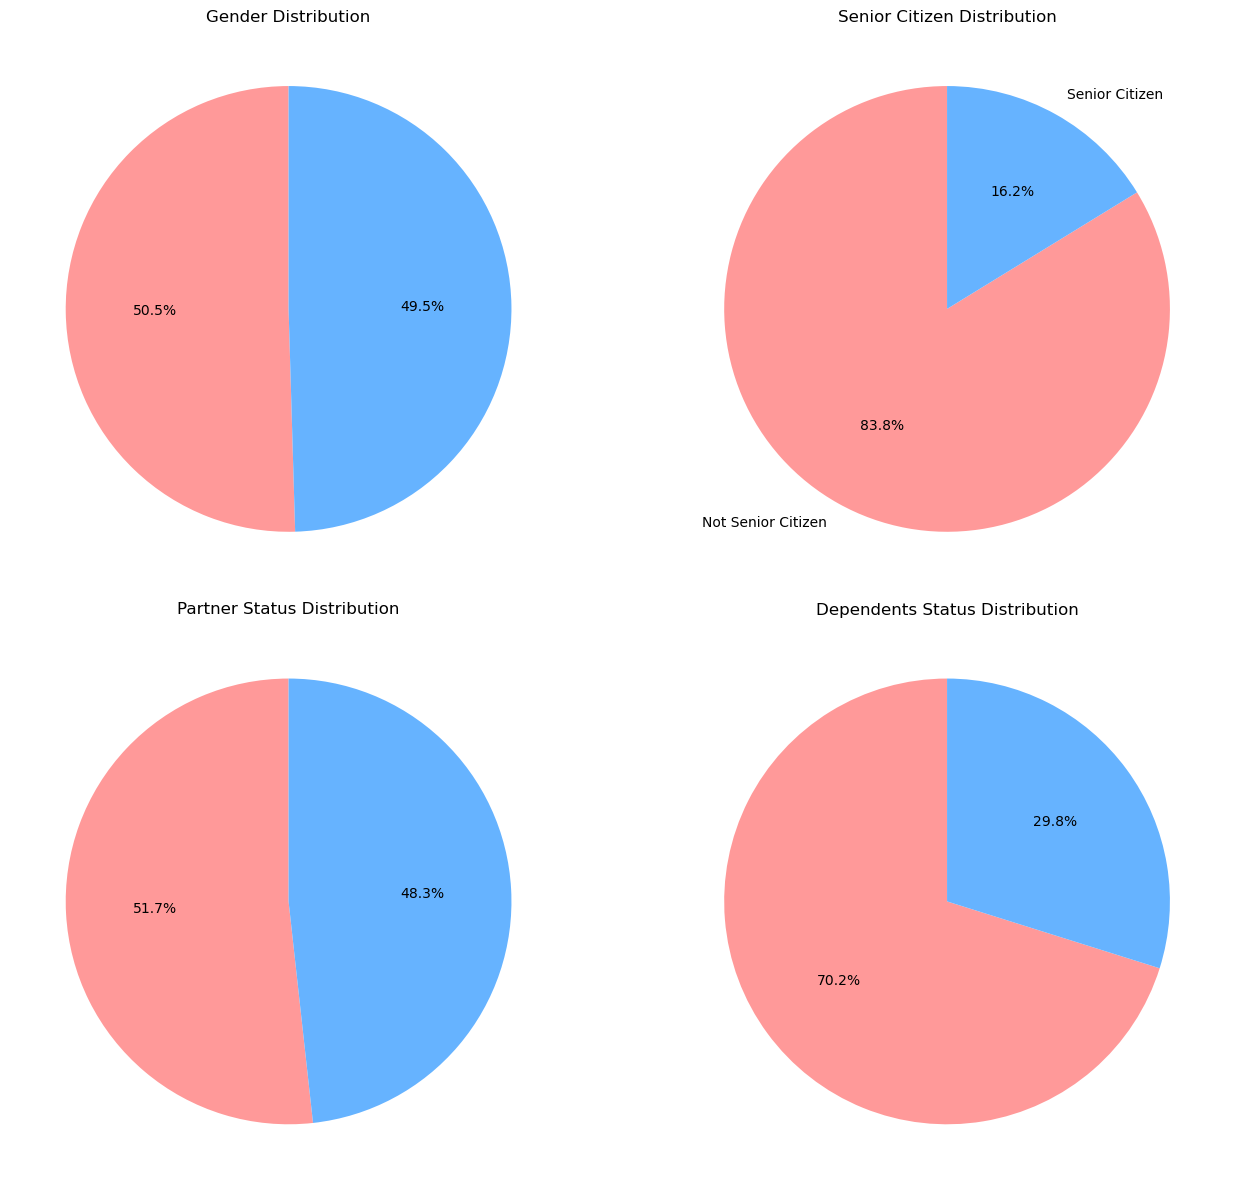

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# Gender distribution
gender_counts = df['gender'].value_counts()
axs[0, 0].pie(gender_counts, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
axs[0, 0].set_title('Gender Distribution')
axs[0, 0].set_ylabel('')  # Hide the y-label for the pie chart

# Senior Citizen distribution
senior_citizen_counts = df['SeniorCitizen'].value_counts()
senior_citizen_labels = ['Not Senior Citizen', 'Senior Citizen']
axs[0, 1].pie(senior_citizen_counts, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'], labels=senior_citizen_labels)
axs[0, 1].set_title('Senior Citizen Distribution')
axs[0, 1].set_ylabel('')  # Hide the y-label for the pie chart

# Partner status distribution
partner_counts = df['Partner'].value_counts()
axs[1, 0].pie(partner_counts, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
axs[1, 0].set_title('Partner Status Distribution')
axs[1, 0].set_ylabel('')  # Hide the y-label for the pie chart

# Dependents status distribution
dependents_counts = df['Dependents'].value_counts()
axs[1, 1].pie(dependents_counts, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
axs[1, 1].set_title('Dependents Status Distribution')
axs[1, 1].set_ylabel('')  # Hide the y-label for the pie chart

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

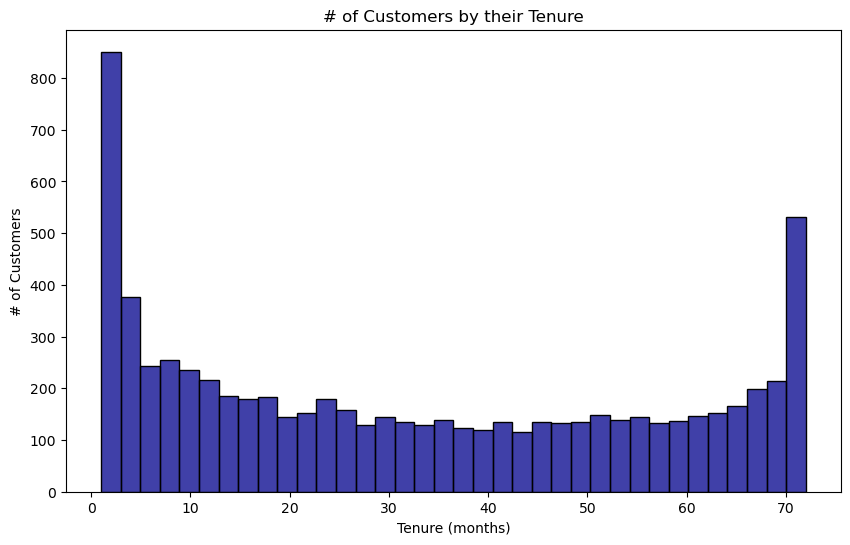

In [12]:
# Create a histogram for 'tenure'
plt.figure(figsize=(10, 6))

# Plot histogram
sns.histplot(df['tenure'], bins=int(180/5), color='darkblue', edgecolor='black')

# Set the title and labels
plt.title('# of Customers by their Tenure')
plt.xlabel('Tenure (months)')
plt.ylabel('# of Customers')

# Show the plot
plt.show()


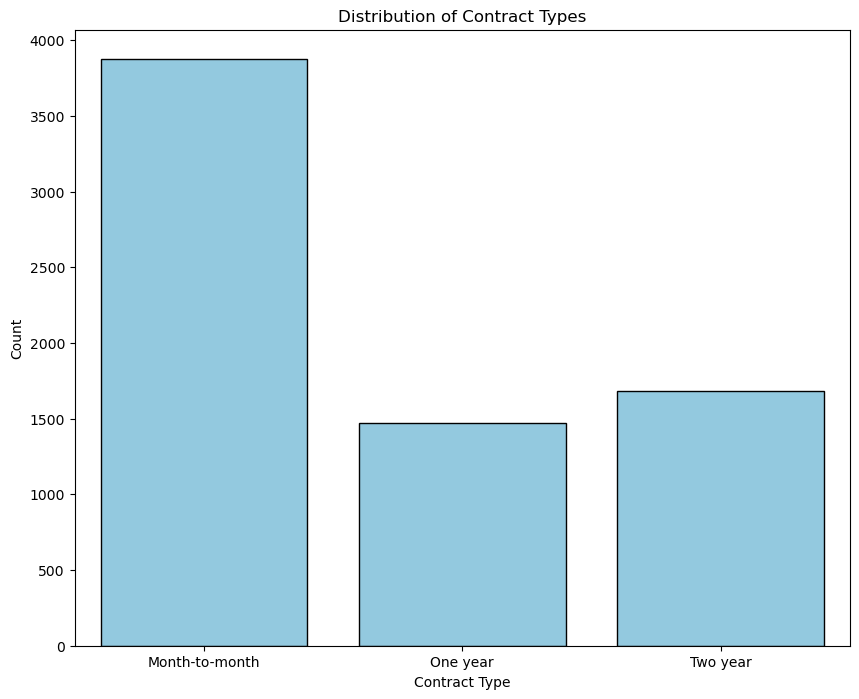

In [13]:
plt.figure(figsize=(10, 8))
# Plot for 'Contract'
sns.countplot(x='Contract', data=df, color='skyblue', edgecolor ='black')
plt.title('Distribution of Contract Types')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()

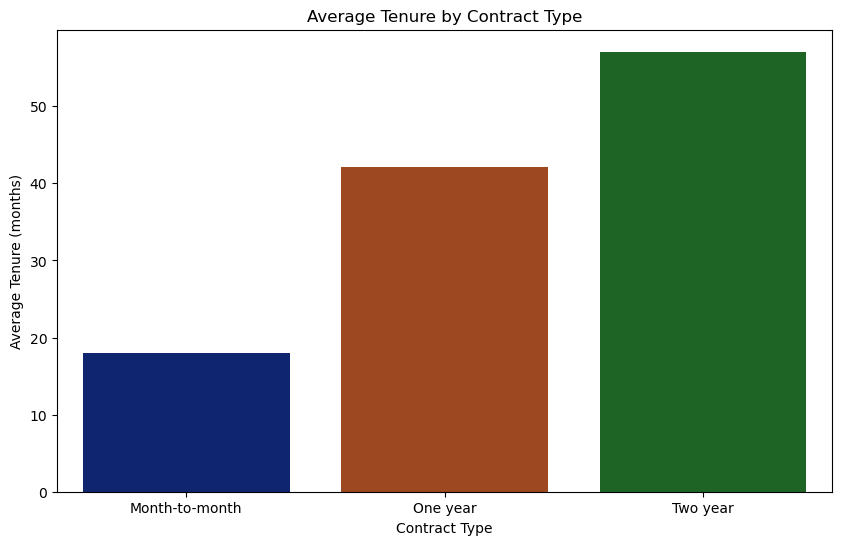

In [14]:
# Group by contract type and calculate the average tenure
contract_tenure = df.groupby('Contract')['tenure'].mean().reset_index()

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Contract', y='tenure', data=contract_tenure, palette='dark')

# Set the plot labels and title
plt.xlabel('Contract Type')
plt.ylabel('Average Tenure (months)')
plt.title('Average Tenure by Contract Type')
plt.show()


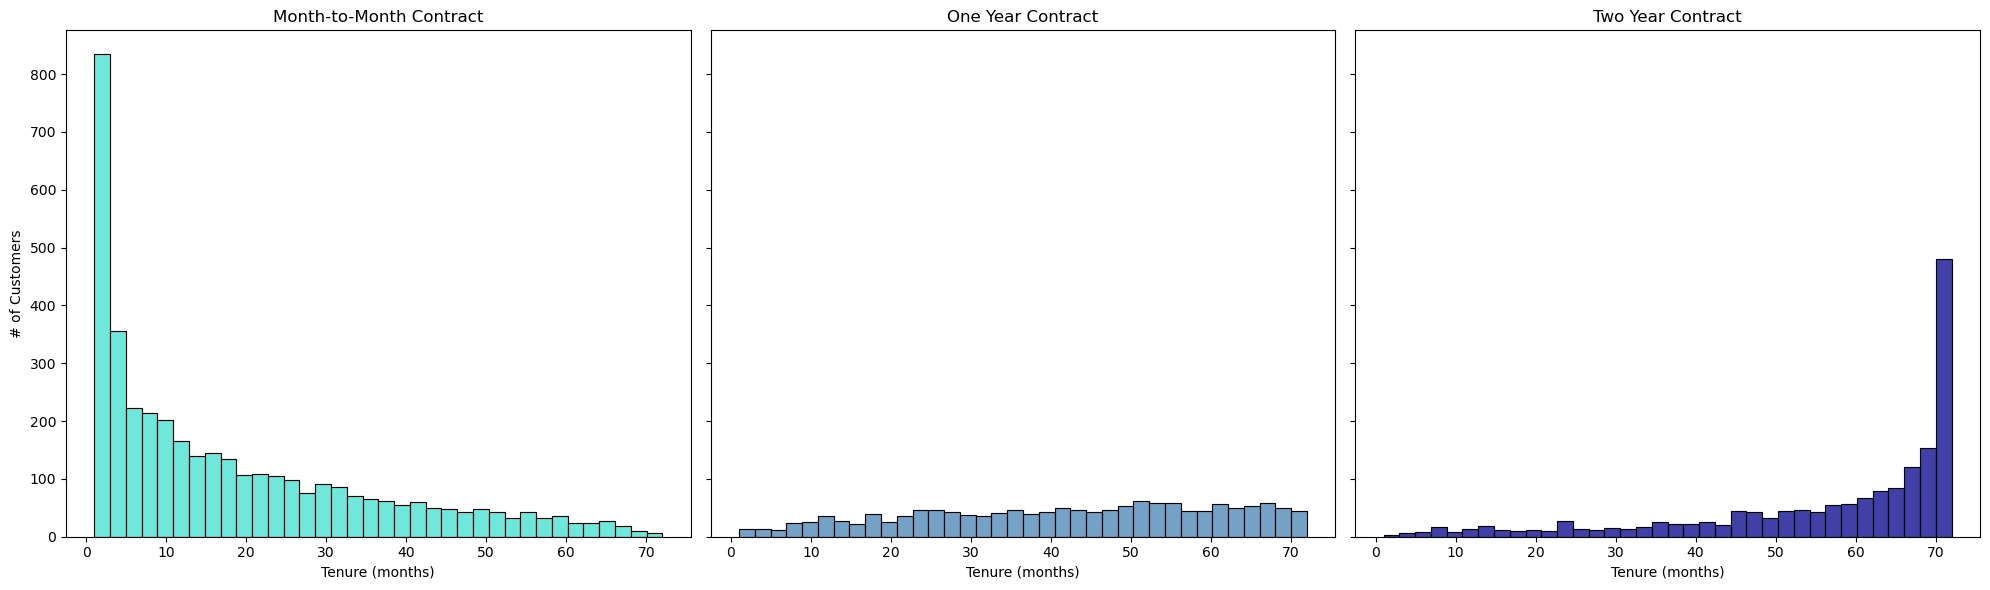

In [15]:
# Create a subplot with three histograms for each contract type
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(20, 6))

# Plot for 'Month-to-month' contract
sns.histplot(data=df[df['Contract'] == 'Month-to-month'], x='tenure', bins=int(180/5), color='turquoise', edgecolor='black', ax=ax1)
ax1.set_ylabel('# of Customers')
ax1.set_xlabel('Tenure (months)')
ax1.set_title('Month-to-Month Contract')

# Plot for 'One year' contract
sns.histplot(data=df[df['Contract'] == 'One year'], x='tenure', bins=int(180/5), color='steelblue', edgecolor='black', ax=ax2)
ax2.set_xlabel('Tenure (months)')
ax2.set_title('One Year Contract')

# Plot for 'Two year' contract
sns.histplot(data=df[df['Contract'] == 'Two year'], x='tenure', bins=int(180/5), color='darkblue', edgecolor='black', ax=ax3)
ax3.set_xlabel('Tenure (months)')
ax3.set_title('Two Year Contract')

# Adjust layout
plt.tight_layout()
plt.show()


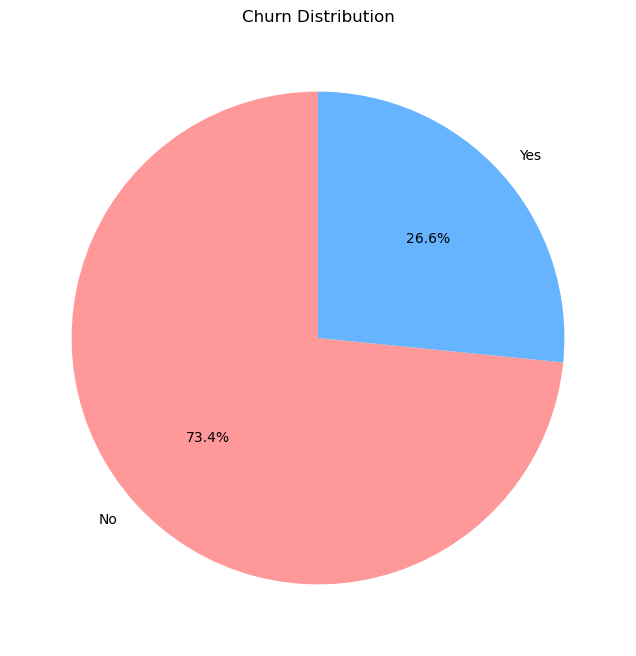

In [16]:
import matplotlib.pyplot as plt

# Count the number of occurrences for each value in the 'Churn' column
churn_counts = df['Churn'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', colors=['#FF9999', '#66B3FF'], startangle=90)

# Add title
plt.title('Churn Distribution')

# Show the plot
plt.show()


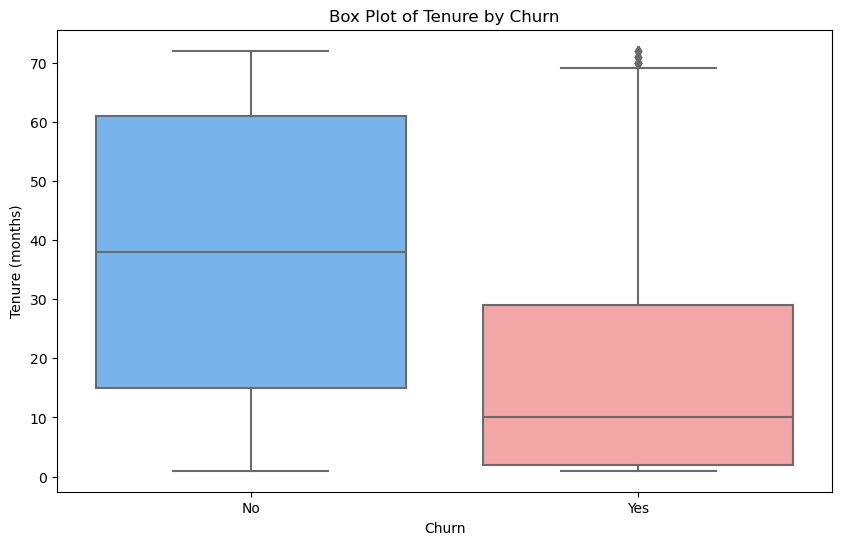

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='tenure', data=df, palette={'Yes': '#FF9999', 'No': '#66B3FF'})

# Add titles and labels
plt.title('Box Plot of Tenure by Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure (months)')

# Show the plot
plt.show()

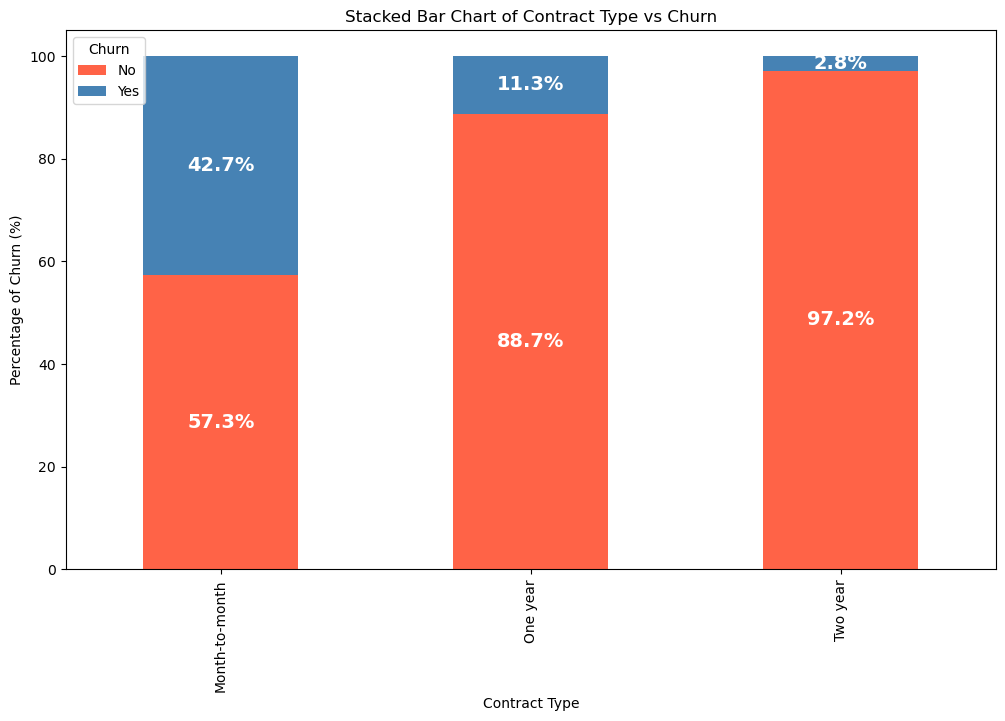

In [18]:
# Calculate the count of each churn status within each contract type
contract_churn = df.groupby(['Contract', 'Churn']).size().unstack().fillna(0)

# Calculate the percentage of churn within each contract type
contract_churn_percentage = contract_churn.div(contract_churn.sum(axis=1), axis=0) * 100

# Plot the stacked bar chart
ax = contract_churn_percentage.plot(kind='bar', stacked=True, figsize=(12, 7), color=['#FF6347', '#4682B4'])

# Add titles and labels
plt.title('Stacked Bar Chart of Contract Type vs Churn')
plt.xlabel('Contract Type')
plt.ylabel('Percentage of Churn (%)')

# Add value counts on the bars
# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.1f}%', 
                (x + width / 2, y + height / 2),
                ha='center', va='center',
                color='white',
                weight='bold',
                size=14)


# Add legend
plt.legend(title='Churn', labels=['No', 'Yes'])

# Show the plot
plt.show()



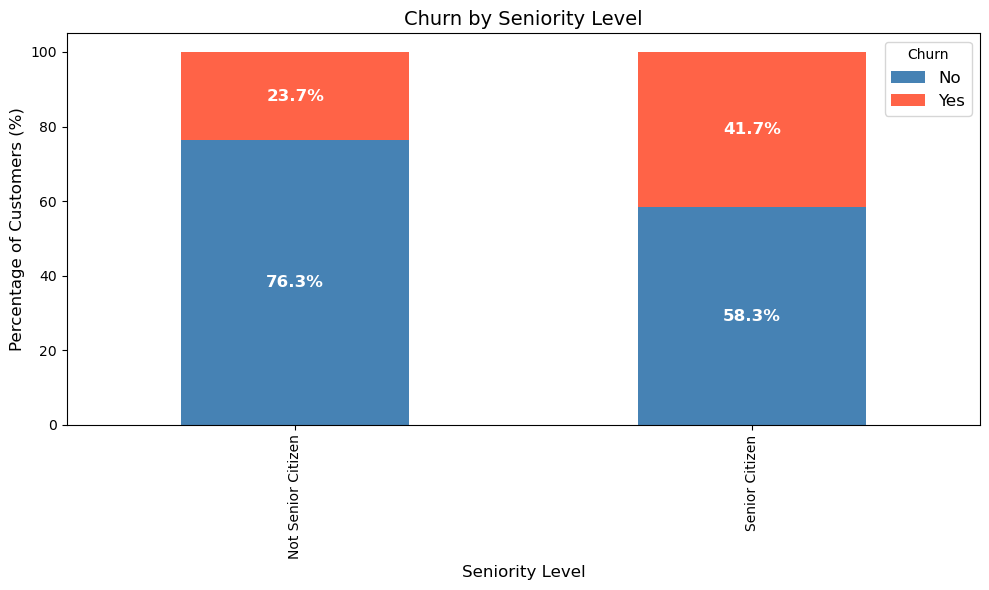

In [19]:
# Map 'SeniorCitizen' column to more descriptive labels
df['SeniorCitizen'] = df['SeniorCitizen'].map({0: 'Not Senior Citizen', 1: 'Senior Citizen'})

# Calculate the count of churn status within each seniority level
senior_churn = df.groupby(['SeniorCitizen', 'Churn']).size().unstack().fillna(0)

# Calculate the percentage of churn within each seniority level
senior_churn_percent = senior_churn.div(senior_churn.sum(axis=1), axis=0) * 100

# Plot the stacked bar chart
ax = senior_churn_percent.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#4682B4', '#FF6347'])

# Set plot labels and title
plt.xlabel('Seniority Level', fontsize=12)
plt.ylabel('Percentage of Customers (%)', fontsize=12)
plt.title('Churn by Seniority Level', fontsize=14)
plt.legend(title='Churn', labels=['No', 'Yes'], fontsize=12)

# Add percentage labels on the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:
        ax.text(x + width / 2, y + height / 2,
                f'{height:.1f}%',
                ha='center', va='center', color='white', fontsize=12, fontweight='bold')

# Adjust layout
plt.tight_layout()
plt.show()


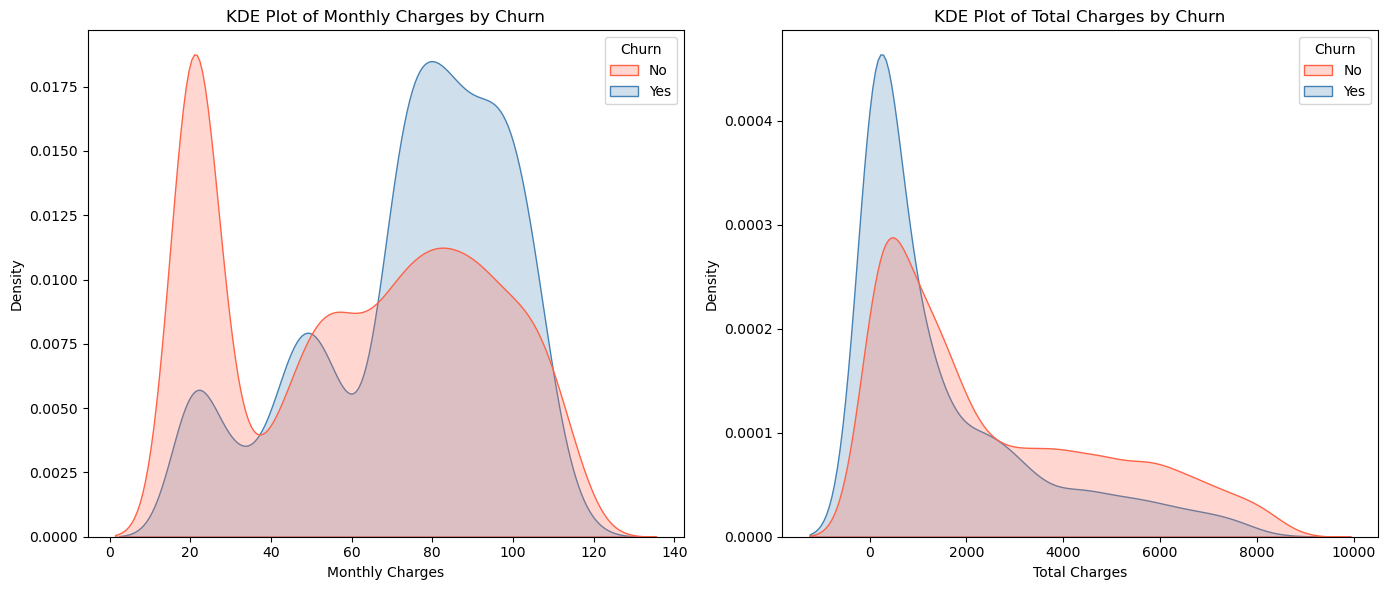

In [20]:
plt.figure(figsize=(14, 6))

# KDE plot for Monthly Charges
plt.subplot(1, 2, 1)
sns.kdeplot(data=df, x='MonthlyCharges', hue='Churn', fill=True, common_norm=False, palette=['#FF6347', '#4682B4'])
plt.title('KDE Plot of Monthly Charges by Churn')
plt.xlabel('Monthly Charges')
plt.ylabel('Density')

# KDE plot for Total Charges
plt.subplot(1, 2, 2)
sns.kdeplot(data=df, x='TotalCharges', hue='Churn', fill=True, common_norm=False, palette=['#FF6347', '#4682B4'])
plt.title('KDE Plot of Total Charges by Churn')
plt.xlabel('Total Charges')
plt.ylabel('Density')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()